# BIOEN 498 Special Topics: Advanced Controls for Biological Systems
HW1

Sophia Shan

01/31/2024





**Comments**: 25/25. Good problem description, but you need to refine the operating region more. See my comments. Please make refinements before you submit HW 2.

**1. Problem Description and System Design**


The problem that we want to investigate in this assignment is the influence of the amount of insulin receptor on blood glucose level for type 2 diabetes that originate from adipose tissue.

In terms of control objectives, we want to test the settling time of blood glucose with different amounts of insulin receptors. In addition, we are also curious about the influence of insulin receptor levels on the range of glucose fluctuation.

**2. System Identification**

The SBML model we will use is the insulin signalling in human adipocytes.

The output of our system is the blood glucose concentration, and the system input is the level of insulin receptors.

The effect of insulin receptor increase seems to have non-monotonic effect on blood glucose level in the beginning, but after settling time, the increase of insulin receptor has a negative monotonic effect on blood glucose level.

The reasonable input operating region is roughly 0 - 1000. And the range of outputs that can be achieved is 15 - 50.





updates: 02/07/2024



 SBML model:insulin signalling in human adipocytes.

1. Output: blood glucose concentration
1. Input: insulin receptor
1. Directional effect of the input on the output: non-monotonic effect in the beginning, then decreasing the concentration of the output with steps.
1. Operating region for the input: 0-1000
1. Range of outputs that can be achieved: 15-50


In [1]:
!pip install -q controlSBML
!pip install -q tellurium
!pip install numpy==1.24.4


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
from controlSBML import ControlSBML
import control
import tellurium as te
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Function that adjust model parameters
def plotModel(model, title="", is_plot=True, input_species=None, times=np.linspace(0, 5, 50), selections=None, figsize=(4,4), **kwargs):
    """
    Plots the simulation with the specified parameter values.

    Parameters
    ----------
    model: str either antimony or URL
    title: str (plot title)
    is_plot: bool
    input_species: str (species used as input if it is not a boundary/fixed species in the model)
    times: array-float (times for simulations)
    selections: list-str (species to plot)
    figsize: int, int (dimensions of the figure)
    kwargs: dict
        key: parameter name
        value: parameter value

    Returns
    -------
    NamedArray
    """
    if "http" in model:
        rr = te.loadSBMLModel(model)
    else:
        rr = te.loada(model)
    if input_species is not None:
        rr.setBoundary(input_species, True)
    if selections is not None:
        new_selections = list(selections)
        if not "time" in selections:
            new_selections.insert(0, "time")
    else:
        new_selections = selections
    for name, value in kwargs.items():
        rr[name] = value
    simulation_results = rr.simulate(times[0], times[-1], len(times), selections=new_selections)
    if is_plot:
        _, ax = plt.subplots(1, figsize=figsize)
        columns = simulation_results.colnames
        columns = columns[1:]
        for column in columns:
            if column == "time":
                next
            ax.plot(simulation_results[:, 0], simulation_results[column])
        plt.legend(columns)
        ax.set_xlabel("time")
    return simulation_results


In [4]:
URL = "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1304160000/2/BIOMD0000000449_url.xml"
# "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL0911270008/3/BIOMD0000000663_url.xml"
#"https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1304160000/2/BIOMD0000000449_url.xml"
#"https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1504130001/3/BIOMD0000000575_url.xml"
#"https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1608150000/2/BIOMD0000000615_url.xml"

# "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1909250003/2/Varusai2018.xml"
#"https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL0912070000/2/BIOMD0000000293_url.xml"
#"https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1608150000/2/BIOMD0000000615_url.xml"
mod = te.loadSBMLModel(URL)
mod.getFloatingSpeciesIds()

['IR',
 'IRp',
 'IRins',
 'IRip',
 'IRi',
 'IRS1',
 'IRS1p',
 'IRS1p307',
 'IRS1307',
 'X',
 'Xp',
 'PKB',
 'PKB308p',
 'PKB473p',
 'PKB308p473p',
 'mTORC1',
 'mTORC1a',
 'mTORC2',
 'mTORC2a',
 'AS160',
 'AS160p',
 'GLUT4m',
 'GLUT4',
 'S6K',
 'S6Kp',
 'S6',
 'S6p']

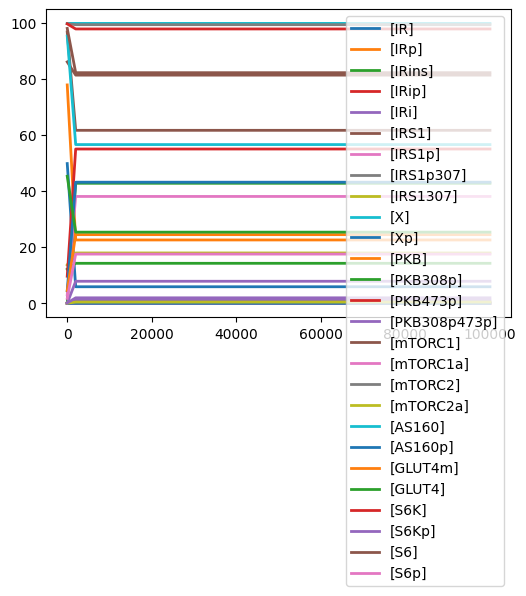

In [5]:
rez = mod.simulate(0, 100000)
mod.plot()

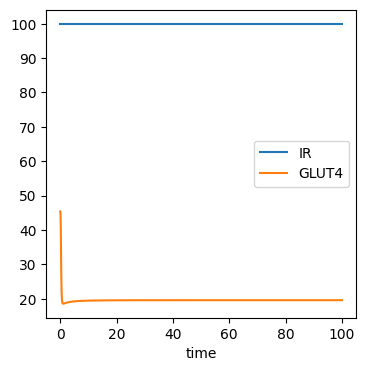

In [6]:
_ = plotModel(URL,  input_species="IR", selections=[ "IR",  "GLUT4"], IR = 100, times=np.linspace(0, 100, 1000))

**Comments:** Use print so this is formatted - ``print(mod.getAntimony()``

In [7]:
mod.getAntimony()

'// Created by libAntimony v2.13.2\nmodel *MODEL1304160000()\n\n  // Compartments and Species:\n  compartment cellvolume;\n  species IR in cellvolume, IRp in cellvolume, IRins in cellvolume, IRip in cellvolume;\n  species IRi in cellvolume, IRS1 in cellvolume, IRS1p in cellvolume, IRS1p307 in cellvolume;\n  species IRS1307 in cellvolume, X in cellvolume, Xp in cellvolume, PKB in cellvolume;\n  species PKB308p in cellvolume, PKB473p in cellvolume, PKB308p473p in cellvolume;\n  species mTORC1 in cellvolume, mTORC1a in cellvolume, mTORC2 in cellvolume;\n  species mTORC2a in cellvolume, AS160 in cellvolume, AS160p in cellvolume;\n  species GLUT4m in cellvolume, GLUT4 in cellvolume, S6K in cellvolume, S6Kp in cellvolume;\n  species S6 in cellvolume, S6p in cellvolume;\n\n  // Assignment Rules:\n  measuredIRp := scaleIR*(IRp + IRip);\n  measuredIRint := IRi + IRip;\n  measuredIRS1p := scaleIRS1*(IRS1p + IRS1p307);\n  measuredIRS1307 := scaleIRS1307*(IRS1p307 + IRS1307);\n  measuredPKB308p :=

In [8]:
ctlsb = ControlSBML(mod, input_names=["IR"], output_names=["GLUT4"], is_fixed_input_species=True)

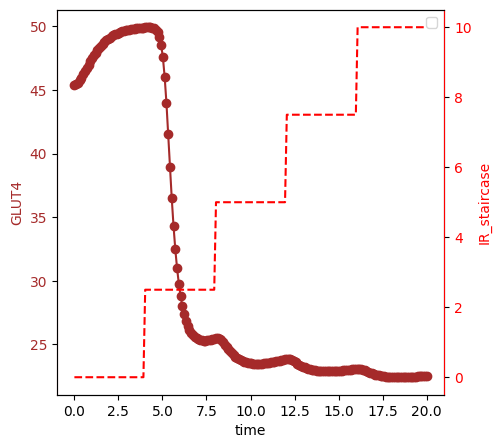

In [9]:
_, builder = ctlsb.plotStaircaseResponse(initial_value=0, final_value=10, num_step=4,
                                         times=np.linspace(0, 20, 200))

**Comments:** You may want to limit the operating region so that you get better distinction between steps. Also, there are some dynamics in the system that aren't apparent in the time scale that you used. See the plot below.

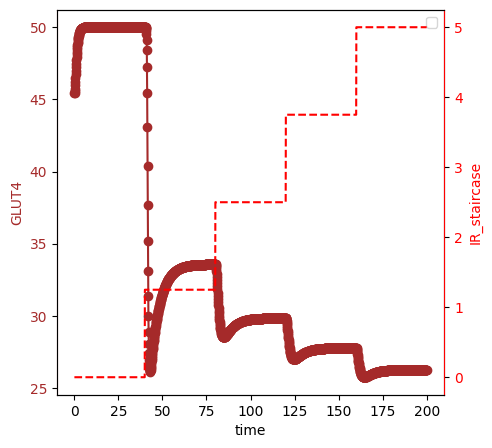

In [10]:
_ = ctlsb.plotStaircaseResponse(initial_value=0, final_value=5, num_step=4,
                                         times=np.linspace(0, 200, 2000))

**3. Testbed Construction and Control Design**